# Lecture 07 – Data Science


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




## Structure: Different File Formats

There are many file types for storing structured data: CSV, TSV, JSON, XML, ASCII, SAS...
* Documentation will be your best friend to understand how to process many of these file types.
* In lecture, we covered TSV and JSON since pandas supports them out-of-box.

### TSV

**TSV** (Tab-Separated Values) files are very similar to CSVs, but now items are delimited by tabs.

Let's check out `cdc_tuberculosis.tsv`, which is the same data but now in a TSV.

Quick Python reminders: Ways to represent data of TSV file
* Python's `print()` prints each string (including the newline), and an additional newline on top of that.
* We use the `repr()` function to return the raw string with all special characters.
* The `enumerate(x)` function returns a counter along with the elements of `x`.

In [2]:
# code here
with open("/content/cdc_tuberculosis.tsv", "r") as f:
    for row in f.readlines():
        print(repr(row))

'\tNo. of TB cases\t\t\tTB incidence\t\t\n'
'U.S. jurisdiction\t2019\t2020\t2021\t2019\t2020\t2021\n'
'Total\t"8,900"\t"7,173"\t"7,860"\t2.71\t2.16\t2.37\n'
'Alabama\t87\t72\t92\t1.77\t1.43\t1.83\n'
'Alaska\t58\t58\t58\t7.91\t7.92\t7.92\n'
'Arizona\t183\t136\t129\t2.51\t1.89\t1.77\n'
'Arkansas\t64\t59\t69\t2.12\t1.96\t2.28\n'
'California\t"2,111"\t"1,706"\t"1,750"\t5.35\t4.32\t4.46\n'
'Colorado\t66\t52\t58\t1.15\t0.9\t1\n'
'Connecticut\t67\t54\t54\t1.88\t1.5\t1.5\n'
'Delaware\t18\t17\t43\t1.84\t1.71\t4.29\n'
'District of Columbia\t24\t19\t19\t3.39\t2.75\t2.84\n'
'Florida\t558\t412\t499\t2.6\t1.91\t2.29\n'
'Georgia\t302\t221\t228\t2.84\t2.06\t2.11\n'
'Hawaii\t99\t92\t106\t6.99\t6.34\t7.35\n'
'Idaho\t7\t8\t4\t0.39\t0.43\t0.21\n'
'Illinois\t326\t216\t255\t2.57\t1.69\t2.01\n'
'Indiana\t108\t92\t127\t1.6\t1.36\t1.87\n'
'Iowa\t52\t39\t49\t1.65\t1.22\t1.53\n'
'Kansas\t37\t37\t43\t1.27\t1.26\t1.47\n'
'Kentucky\t66\t67\t57\t1.48\t1.49\t1.26\n'
'Louisiana\t88\t99\t86\t1.89\t2.13\t1.86\n'
'Maine\

A quick note: the above is a very explicit way to loop over the first 4 lines of the file by controlling a line counter. We can do the same with more concise code by letting Python read the lines in the file for us and grabbing the first four using **readlines()**: function

In [4]:
with open("/content/cdc_tuberculosis.tsv", "r") as f:
    for row in f.readlines()[:4]:
        print(repr(row)) # print raw strings

'\tNo. of TB cases\t\t\tTB incidence\t\t\n'
'U.S. jurisdiction\t2019\t2020\t2021\t2019\t2020\t2021\n'
'Total\t"8,900"\t"7,173"\t"7,860"\t2.71\t2.16\t2.37\n'
'Alabama\t87\t72\t92\t1.77\t1.43\t1.83\n'


The `pd.read_csv` function also reads in TSVs if we specify the **delimiter** with parameter `sep='\t'` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)).

In [5]:
#code here
import pandas as pd
data = pd.read_csv('/content/cdc_tuberculosis.tsv', sep='\t')
data


,Unnamed: 0,No. of TB cases,Unnamed: 2,Unnamed: 3,TB incidence,Unnamed: 5,Unnamed: 6
0,U.S. jurisdiction,2019,2020,2021,2019.00,2020.00,2021.00
1,Total,"8,900","7,173","7,860",2.71,2.16,2.37
2,Alabama,87,72,92,1.77,1.43,1.83
3,Alaska,58,58,58,7.91,7.92,7.92
4,Arizona,183,136,129,2.51,1.89,1.77
5,Arkansas,64,59,69,2.12,1.96,2.28
6,California,"2,111","1,706","1,750",5.35,4.32,4.46
7,Colorado,66,52,58,1.15,0.90,1.00
8,Connecticut,67,54,54,1.88,1.50,1.50
9,Delaware,18,17,43,1.84,1.71,4.29


*Side note*: there was a question last time on how pandas differentiates a comma delimiter vs. a comma within the field itself, e.g., `8,900`. Check out the documentation for the `quotechar` parameter.

### JSON
The City of Berkeley Open Data [website](https://data.cityofberkeley.info/Health/COVID-19-Confirmed-Cases/xn6j-b766) has a dataset with COVID-19 Confirmed Cases among Berkeley residents by date.

Let's first check out this website.

Next, let's download this file, saving it as a JSON (note the source URL file type).

In the interest of **reproducible data science** we will download the data programatically.  We have defined some helper functions in the **utils.py** file.  I can then reuse these helper functions in many different notebooks.

In [ ]:
# just run this cell
#from Lec07ds100_utils import fetch_and_cache
import requests
from pathlib import Path
import time


def fetch_and_cache(data_url, file, data_dir="/content/drive/MyDrive/data", force=False):
    """
    Download and cache a url and return the file object.

    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded

    return: The pathlib.Path object representing the file.
    """

    ### BEGIN SOLUTION
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok = True)
    file_path = data_dir / Path(file)
    # If the file already exists and we want to force a download then
    # delete the file first so that the creation date is correct.
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
        last_modified_time = time.ctime(file_path.stat().st_mtime)
    else:
        last_modified_time = time.ctime(file_path.stat().st_mtime)
        print("Using cached version that was downloaded (UTC):", last_modified_time)
    return file_path
    ### END SOLUTION


In [ ]:
covid_file = fetch_and_cache(
    "https://data.cityofberkeley.info/api/views/xn6j-b766/rows.json?accessType=DOWNLOAD",
    "confirmed-cases.json", force=False)
covid_file          # a file path wrapper object

Using cached version that was downloaded (UTC): Wed May 15 17:46:35 2024


PosixPath('/content/drive/MyDrive/data/confirmed-cases.json')

In [6]:
import json
import numpy as np
import pandas as pd


with open('/content/confirmed-cases.json', 'r') as file:

    data = json.load(file)
print(data)

{'meta': {'view': {'id': 'xn6j-b766', 'name': 'COVID-19 Confirmed Cases', 'assetType': 'dataset', 'attribution': 'City of Berkeley', 'averageRating': 0, 'category': 'Health', 'createdAt': 1587074071, 'description': 'Counts of confirmed COVID-19 cases among Berkeley residents by date. As of 6/21/22, this dataset will be updated weekly instead of daily. As of 11/14/22, this dataset only includes PCR cases.', 'displayType': 'table', 'downloadCount': 4178, 'hideFromCatalog': False, 'hideFromDataJson': False, 'newBackend': True, 'numberOfComments': 0, 'oid': 37306599, 'provenance': 'official', 'publicationAppendEnabled': False, 'publicationDate': 1623695944, 'publicationGroup': 17032857, 'publicationStage': 'published', 'rowsUpdatedAt': 1707150951, 'rowsUpdatedBy': 'g3qt-vv5v', 'tableId': 18345932, 'totalTimesRated': 0, 'viewCount': 30376, 'viewLastModified': 1707150950, 'viewType': 'tabular', 'approvals': [{'reviewedAt': 1587165900, 'reviewedAutomatically': True, 'state': 'approved', 'subm

#### File size

Often, I like to start my analysis by getting a rough estimate of the size of the data.  This will help inform the tools I use and how I view the data.  If it is relatively small I might use a text editor or a spreadsheet to look at the data.  If it is larger, I might jump to more programmatic exploration or even used distributed computing tools.

However here we will use Python tools to probe the file.

Since these seem to be text files I might also want to investigate the number of lines, which often corresponds to the number of records.

You can use .getsize to identify the size of a file on specific path.
And iterat over line in a file to count total number of lines.

In [ ]:
import os

#Code  for file size
file_path = '/content/cdc_tuberculosis.tsv'
file_size = os.path.getsize(file_path)
print(file_size)

# Code Here for total number of lines
with open(file_path, 'r') as file:
    lines = file.readlines()
    num_lines = len(lines)
print(num_lines)

1875
54


As part of your workflow, you should also learn some basic Unix commands, as these are often very handy (in fact, there's an entire book called ["Data Science at the Command Line"](https://datascienceatthecommandline.com) that explores this idea in depth!).

In Jupyter/IPython, you can prefix lines with `!` to execute arbitrary Unix commands, and within those lines, you can refer to Python variables and expressions with the syntax `{expr}`.

Here, we use the `ls` command to list files, using the `-lh` flags, which request "long format with information in human-readable form". We also use the `wc` command for "word count", but with the `-l` flag, which asks for line counts instead of words.

These two give us the same information as the code above, albeit in a slightly different form:

In [ ]:
!ls -lh {covid_file}
!wc -l {covid_file}

-rw------- 1 root root 249K May 15 17:46 /content/drive/MyDrive/data/confirmed-cases.json
2036 /content/drive/MyDrive/data/confirmed-cases.json


### EDA: Digging into JSON

Python has relatively good support for JSON data since it closely matches the internal python object model.  In the following cell we import the entire JSON datafile into a python dictionary using the `json` package.

In [7]:
# code here
import json

with open('/content/confirmed-cases.json', 'r') as file:

    data = json.load(file)
print(data)

{'meta': {'view': {'id': 'xn6j-b766', 'name': 'COVID-19 Confirmed Cases', 'assetType': 'dataset', 'attribution': 'City of Berkeley', 'averageRating': 0, 'category': 'Health', 'createdAt': 1587074071, 'description': 'Counts of confirmed COVID-19 cases among Berkeley residents by date. As of 6/21/22, this dataset will be updated weekly instead of daily. As of 11/14/22, this dataset only includes PCR cases.', 'displayType': 'table', 'downloadCount': 4178, 'hideFromCatalog': False, 'hideFromDataJson': False, 'newBackend': True, 'numberOfComments': 0, 'oid': 37306599, 'provenance': 'official', 'publicationAppendEnabled': False, 'publicationDate': 1623695944, 'publicationGroup': 17032857, 'publicationStage': 'published', 'rowsUpdatedAt': 1707150951, 'rowsUpdatedBy': 'g3qt-vv5v', 'tableId': 18345932, 'totalTimesRated': 0, 'viewCount': 30376, 'viewLastModified': 1707150950, 'viewType': 'tabular', 'approvals': [{'reviewedAt': 1587165900, 'reviewedAutomatically': True, 'state': 'approved', 'subm

The `covid_json` variable is now a dictionary encoding the data in the file:

In [8]:
# find type
import json

with open('/content/confirmed-cases.json', 'r') as file:

    data = json.load(file)
print(type(data))

<class 'dict'>


#### Examine what keys are in the top level json object

We can list the keys to determine what data is stored in the object.

In [ ]:
#explore keys

dict_keys(['meta', 'data'])

In [10]:
with open('/content/confirmed-cases.json', 'r') as file:

    data = json.load(file)
keys = data.keys()
print(keys)

dict_keys(['meta', 'data'])


**Observation**: The JSON dictionary contains a `meta` key which likely refers to meta data (data about the data).  Meta data often maintained with the data and can be a good source of additional information.

<br/>

We can investigate the meta data further by examining the keys associated with the metadata.

In [9]:
# explore nested dic
data['meta'].keys()

dict_keys(['view'])

The `meta` key contains another dictionary called `view`.  This likely refers to meta-data about a particular "view" of some underlying database.  We will learn more about views when we study SQL later in the class.    

In [11]:
# code here
data['meta']['view'].keys()

dict_keys(['id', 'name', 'assetType', 'attribution', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'approvals', 'clientContext', 'columns', 'grants', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

Notice that this a nested/recursive data structure.  As we dig deeper we reveal more and more keys and the corresponding data:

```
meta
|-> data
    | ... (haven't explored yet)
|-> view
    | -> id
    | -> name
    | -> attribution
    ...
    | -> description
    ...
    | -> columns
    ...
```

There is a key called description in the view sub dictionary.  This likely contains a description of the data:

In [12]:
# code Here
print(data['meta']['view']['description'])

Counts of confirmed COVID-19 cases among Berkeley residents by date. As of 6/21/22, this dataset will be updated weekly instead of daily. As of 11/14/22, this dataset only includes PCR cases.



#### Examining the Data Field for Records

We can look at a few entries in the `data` field. This is what we'll load into Pandas.


In [13]:
for i in range(3):
    print(f"{i:03} | {data['data'][i]}")

000 | ['row-xfhw-k4kf~35fi', '00000000-0000-0000-BE3B-33EB4AE9ECDC', 0, 1707150951, None, 1707150951, None, '{ }', '2019-12-01T00:00:00', '0', '0']
001 | ['row-wymk_fnv3~t2aq', '00000000-0000-0000-1F55-12176B7CEE03', 0, 1707150951, None, 1707150951, None, '{ }', '2019-12-02T00:00:00', '0', '0']
002 | ['row-bmrx_499z-jxcu', '00000000-0000-0000-EEAE-B272E2A35814', 0, 1707150951, None, 1707150951, None, '{ }', '2019-12-03T00:00:00', '0', '0']


Observations:
* These look like equal-length records, so maybe `data` is a table!
* But what do each of values in the record mean? Where can we find column headers?

Back to the metadata.

#### Columns Metadata

Another potentially useful key in the metadata dictionary is the `columns`.  This returns a list:

In [14]:
# code here
data['meta']['view']['columns']

print(type(data['meta']['view']['columns']))

<class 'list'>


Let's go back to the file explorer.

Based on the contents of this key, what are reasonable names for each column in the `data` table?

You can also get the view that Jupyter provides in the file explorer by using Python. This displays our JSON object as an interacive graphical object with a built-in search box:

In [ ]:
# code here

<IPython.core.display.JSON object>

#### Summary of exploring the JSON file

1. The above **metadata** tells us a lot about the columns in the data including column names, potential data anomalies, and a basic statistic.
1. Because of its non-tabular structure, JSON makes it easier (than CSV) to create **self-documenting data**, meaning that information about the data is stored in the same file as the data.
1. Self documenting data can be helpful since it maintains its own description and these descriptions are more likely to be updated as data changes.

### JSON with pandas

After our above EDA, let's finally go about loading the data (not the metadata) into a pandas dataframe.

In the following block of code we:
1. Translate the JSON records into a dataframe:

    * fields: `covid_json['meta']['view']['columns']`
    * records: `covid_json['data']`
    
1. Remove columns that have no metadata description.  This would be a bad idea in general but here we remove these columns since the above analysis suggests that they are unlikely to contain useful information.
1. Examine the `tail` of the table.

In [15]:
# Load the data from JSON and assign column titles
# code here
JSON_data = pd.DataFrame(
    data['data'],
    columns=[record['name'] for record in data['meta']['view']['columns']])

JSON_data.tail()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,Date,New Cases,Cumulative Cases
1522,row-gyrq.w5r6~q4jd,00000000-0000-0000-982C-A0B919EBBB5E,0,1707150951,None,1707150951,None,{ },2024-01-31T00:00:00,0,24704
1523,row-xts8~5um7_2cts,00000000-0000-0000-7F70-20D51BE1BF24,0,1707150951,None,1707150951,None,{ },2024-02-01T00:00:00,0,24704
1524,row-vpiw~v78n.mcki,00000000-0000-0000-1D1F-708D9EA9AF87,0,1707150951,None,1707150951,None,{ },2024-02-02T00:00:00,0,24704
1525,row-5ccz~c7zj_y7p6,00000000-0000-0000-4100-FA20101EF43A,0,1707150951,None,1707150951,None,{ },2024-02-03T00:00:00,0,24704
1526,row-g8fs~yq2s~2fhf,00000000-0000-0000-4932-3AFEB065282B,0,1707150951,None,1707150951,None,{ },2024-02-04T00:00:00,0,24704


<br/>

---


## Temporality

Let's briefly look at how we can use pandas `dt` accessors to work with dates/times in a dataset.

We will use the dataset from Lab 3: the Berkeley PD Calls for Service dataset.

In [16]:
calls = pd.read_csv("/content/Berkeley_PD_-_Calls_for_Service.csv")
calls.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,21014296,THEFT MISD. (UNDER $950),04/01/2021 12:00:00 AM,10:58,LARCENY,4,06/15/2021 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
1,21014391,THEFT MISD. (UNDER $950),04/01/2021 12:00:00 AM,10:38,LARCENY,4,06/15/2021 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
2,21090494,THEFT MISD. (UNDER $950),04/19/2021 12:00:00 AM,12:15,LARCENY,1,06/15/2021 12:00:00 AM,"2100 BLOCK HASTE ST\nBerkeley, CA\n(37.864908,...",2100 BLOCK HASTE ST,Berkeley,CA
3,21090204,THEFT FELONY (OVER $950),02/13/2021 12:00:00 AM,17:00,LARCENY,6,06/15/2021 12:00:00 AM,"2600 BLOCK WARRING ST\nBerkeley, CA\n(37.86393...",2600 BLOCK WARRING ST,Berkeley,CA
4,21090179,BURGLARY AUTO,02/08/2021 12:00:00 AM,6:20,BURGLARY - VEHICLE,1,06/15/2021 12:00:00 AM,"2700 BLOCK GARBER ST\nBerkeley, CA\n(37.86066,...",2700 BLOCK GARBER ST,Berkeley,CA


Looks like there are three columns with dates/times: `EVENTDT`, `EVENTTM`, and `InDbDate`.

Most likely, `EVENTDT` stands for the date when the event took place, `EVENTTM` stands for the time of day the event took place (in 24-hr format), and `InDbDate` is the date this call is recorded onto the database.

If we check the data type of these columns, we will see they are stored as strings. We can convert them to `datetime` objects using pandas `to_datetime` function.

In [17]:
# code here
calls["EVENTDT"]= pd.to_datetime(calls["EVENTDT"])
calls["InDbDate"]= pd.to_datetime(calls["InDbDate"])
calls.head()

<ipython-input-17-0fa0db32d96b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  calls["EVENTDT"]= pd.to_datetime(calls["EVENTDT"])


,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,21014296,THEFT MISD. (UNDER $950),2021-04-01,10:58,LARCENY,4,2021-06-15,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
1,21014391,THEFT MISD. (UNDER $950),2021-04-01,10:38,LARCENY,4,2021-06-15,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
2,21090494,THEFT MISD. (UNDER $950),2021-04-19,12:15,LARCENY,1,2021-06-15,"2100 BLOCK HASTE ST\nBerkeley, CA\n(37.864908,...",2100 BLOCK HASTE ST,Berkeley,CA
3,21090204,THEFT FELONY (OVER $950),2021-02-13,17:00,LARCENY,6,2021-06-15,"2600 BLOCK WARRING ST\nBerkeley, CA\n(37.86393...",2600 BLOCK WARRING ST,Berkeley,CA
4,21090179,BURGLARY AUTO,2021-02-08,6:20,BURGLARY - VEHICLE,1,2021-06-15,"2700 BLOCK GARBER ST\nBerkeley, CA\n(37.86066,...",2700 BLOCK GARBER ST,Berkeley,CA


Now we can use the `dt` accessor on this column.

We can get the month:

In [18]:
# code here
calls["EVENTDT"].dt.month

0        4
1        4
2        4
3        2
4        2
        ..
2627    12
2628     2
2629     3
2630     4
2631     2
Name: EVENTDT, Length: 2632, dtype: int32

Which day of the week the date is on:

In [19]:
# code here
calls["EVENTDT"].dt.dayofweek

0       3
1       3
2       0
3       5
4       0
       ..
2627    0
2628    2
2629    2
2630    5
2631    4
Name: EVENTDT, Length: 2632, dtype: int32

Check the mimimum values to see if there are any suspicious-looking, 70s dates:

In [20]:
# code here
calls.sort_values(["EVENTDT"]).head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
2513,20057398,BURGLARY COMMERCIAL,2020-12-17,16:05,BURGLARY - COMMERCIAL,4,2021-06-15,"600 BLOCK GILMAN ST\nBerkeley, CA\n(37.878405,...",600 BLOCK GILMAN ST,Berkeley,CA
624,20057207,ASSAULT/BATTERY MISD.,2020-12-17,16:50,ASSAULT,4,2021-06-15,"2100 BLOCK SHATTUCK AVE\nBerkeley, CA\n(37.871...",2100 BLOCK SHATTUCK AVE,Berkeley,CA
154,20092214,THEFT FROM AUTO,2020-12-17,18:30,LARCENY - FROM VEHICLE,4,2021-06-15,"800 BLOCK SHATTUCK AVE\nBerkeley, CA\n(37.8918...",800 BLOCK SHATTUCK AVE,Berkeley,CA
659,20057324,THEFT MISD. (UNDER $950),2020-12-17,15:44,LARCENY,4,2021-06-15,"1800 BLOCK 4TH ST\nBerkeley, CA\n(37.869888, -...",1800 BLOCK 4TH ST,Berkeley,CA
993,20057573,BURGLARY RESIDENTIAL,2020-12-17,22:15,BURGLARY - RESIDENTIAL,4,2021-06-15,"1700 BLOCK STUART ST\nBerkeley, CA\n(37.857495...",1700 BLOCK STUART ST,Berkeley,CA


Doesn't look like it! We are good!


We can also do many things with the `dt` accessor like switching time zones and converting time back to UNIX/POSIX time. Check out the documentation on [`.dt` accessor](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dt-accessors) and [time series/date functionality](https://pandas.pydata.org/docs/user_guide/timeseries.html#).

---
<br/><br/>

## Data Faithfulness: Mauna Loa CO2 data

CO2 concentrations have been monitored at Mauna Loa Observatory since 1958 ([website link](https://gml.noaa.gov/ccgg/trends/data.html)).




In [22]:
co2_file = "/content/co2_mm_mlo.txt"


Let's do some **EDA**!!

### How do we read the file into Pandas?
Let's instead check out this file with JupyterLab.

* Note it's a `.txt` file.
* Do we trust this file extension?
* What structure is it?


Looking at the first few lines of the data, we spot some relevant characteristics:

- The values are separated by white space, possibly tabs.
- The data line up down the rows. For example, the month appears in 7th to 8th position of each line.
- The 71st and 72nd lines in the file contain column headings split over two lines.

We can use `read_csv` to read the data into a Pandas data frame, and we provide several arguments to specify that the separators are white space, there is no header (**we will set our own column names**), and to skip the first 72 rows of the file.

In [23]:
 # code here
Loa_CO2_data = pd.read_csv(
    co2_file, header = None, skiprows = 72,
    sep = r'\s+'
)
Loa_CO2_data.head()
#delimiter for continuous whitespace (stay tuned for regex next lecture))


,0,1,2,3,4,5,6
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


Congratulations! You've wrangled the data!

<br/>

...But our columns aren't named.
**We need to do more EDA.**

### Exploring Variable Feature Types

The NOAA [webpage](https://gml.noaa.gov/ccgg/trends/) might have some useful tidbits (in this case it doesn't).
Let's go back to the raw data file to identify each feature.


We'll rerun `pd.read_csv`, but this time with some **custom column names.**

In [24]:
# code here
data = pd.read_csv(
    co2_file, header = None, skiprows = 72,
    sep = '\s+', names = ['Year', 'Month', 'Decimal_Date', 'Average', 'Interpolation', 'Trends', 'Days']
)
data.head(5)

,Year,Month,Decimal_Date,Average,Interpolation,Trends,Days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


### Visualizing CO2

Scientific studies tend to have very clean data, right...? Let's jump right in and make a time series plot of CO2 monthly averages.

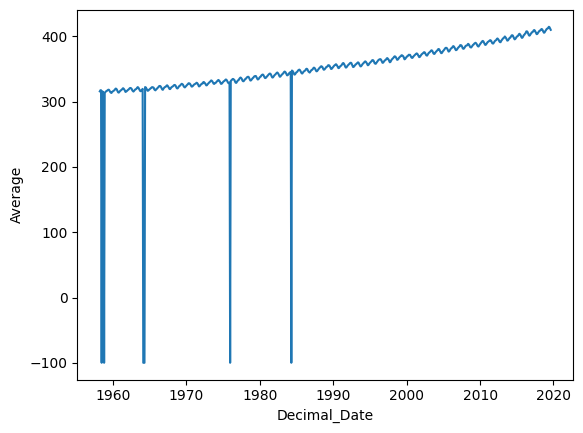

In [25]:
import seaborn as sns
sns.lineplot(data, x='Decimal_Date', y='Average');

Some data have unusual values like -1 and -99.99.

Let's check the description at the top of the file again.
1. -1 signifies a missing value for the number of days `Days` the equipment was in operation that month.
1. -99.99 denotes a missing monthly average `Avg`

How can we fix this? First, let's explore other aspects of our data. Understanding our data will help us decide what to do with the missing values.

<br/>


### Sanity Checks: Reasoning about the data
First, we consider the shape of the data. How many rows should we have?
* If chronological order, we should have one record per month.
* Data from March 1958 to August 2019.
* We should have $ 12 \times (2019-1957) - 2 - 4 = 738 $ records.

In [ ]:
# code here
data.shape

(738, 7)

As expected Jan, Feb, Sep, Oct, Nov, and Dec have 61 occurrences and the rest 62.

<br/><br/>

Next let's explore **days** `Days` itself, which is the number of days that the measurement equipment worked.

In terms of data quality, a handful of months have averages based on measurements taken on fewer than half the days. In addition, there are nearly 200 missing values--**that's about 27% of the data**!

<br/><br/>

Finally, let's check the last time feature, **year** `Yr`.

Let's check to see if there is any connection between missingness and the year of the recording.

### Presenting the data: A Discussion on Data Granularity

From the description:
* monthly measurements are averages of average day measurements.
* The NOAA GML website has datasets for daily/hourly measurements too.

The data you present depends on your research question.

**How do CO2 levels vary by season?**
* You might want to keep average monthly data.

**Are CO2 levels rising over the past 50+ years, consistent with global warming predictions?**
* You might be happier with a **coarser granularity** of average year data!

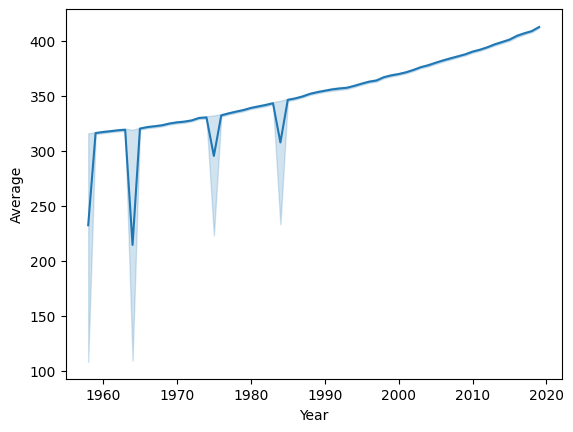

In [26]:
sns.lineplot(data, x='Year', y='Average');

Indeed, we see a rise by nearly 100 ppm of CO2 since Mauna Loa began recording in 1958.